In [2]:
import pandas as pd 
import requests     
import io

In [2]:
url_endpoint = 'http://www.bankofengland.co.uk/boeapps/iadb/fromshowcolumns.asp?csv.x=yes'

In [3]:
payload = {
    'Datefrom'   : '01/Jan/2000',
    'Dateto'     : '01/Oct/2018',
    'SeriesCodes': 'IUMBV34,IUMBV37,IUMBV42,IUMBV45',
    'CSVF'       : 'TN',
    'UsingCodes' : 'Y',
    'VPD'        : 'Y',
    'VFD'        : 'N'
}



headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/54.0.2840.90 '
                  'Safari/537.36'
}

In [4]:
#We can use the requests package to construct the URL with the dictionary of parameters:
response = requests.get(url_endpoint, params=payload, headers=headers)

# Check if the response was successful, it should return '200'
print(response.status_code)
print(response.url)

200
https://www.bankofengland.co.uk/boeapps/database/_iadb-FromShowColumns.asp?csv.x=yes&Datefrom=01%2FJan%2F2000&Dateto=01%2FOct%2F2018&SeriesCodes=IUMBV34%2CIUMBV37%2CIUMBV42%2CIUMBV45&CSVF=TN&UsingCodes=Y&VPD=Y&VFD=N


In [5]:
df = pd.read_csv(io.BytesIO(response.content))
df.head()

,DATE,IUMBV34,IUMBV37,IUMBV42,IUMBV45
0,31 Jan 2000,6.78,6.78,7.09,7.29
1,29 Feb 2000,6.79,6.80,7.11,0
2,31 Mar 2000,6.45,6.70,6.94,6.54
3,30 Apr 2000,6.31,6.68,6.92,6.54
4,31 May 2000,6.39,6.64,6.90,6.69


In [6]:
# Suspicious values in IUMBV45
print(df['IUMBV45'].to_string())

0      7.29
1         0
2      6.54
3      6.54
4      6.69
5      6.69
6      6.69
7      6.69
8      6.98
9      6.99
10     6.99
11     6.99
12     6.78
13     6.37
14     5.89
15     5.89
16     5.89
17     5.99
18     5.99
19     5.89
20     5.89
21     5.59
22     5.59
23     5.59
24     5.59
25     5.59
26     5.79
27     5.89
28     5.89
29     5.77
30     5.76
31      5.6
32     5.46
33      5.7
34     5.75
35     5.76
36     5.62
37     5.42
38     5.22
39     5.42
40     5.29
41     4.94
42     5.11
43     5.49
44     5.69
45      5.9
46     5.93
47     5.55
48     5.71
49     5.72
50     5.79
51     5.91
52     5.97
53     6.15
54     6.09
55     6.09
56     6.09
57     6.03
58     5.79
59     5.65
60     5.63
61     5.68
62     5.62
63     5.42
64     5.37
65     5.21
66     5.12
67     5.12
68     5.11
69     5.14
70     5.25
71     5.24
72     5.16
73        5
74     4.99
75      5.2
76     5.53
77     5.52
78     5.45
79     5.46
80     5.43
81     5.36
82     5.46
83  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     225 non-null    object 
 1   IUMBV34  225 non-null    float64
 2   IUMBV37  225 non-null    float64
 3   IUMBV42  225 non-null    float64
 4   IUMBV45  225 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.9+ KB


In [8]:
# Step 1: Convert 'DATE' to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Step 2: Set 'DATE' to be the index
df = df.set_index('DATE')

# Check the new index
df.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30'],
              dtype='datetime64[ns]', name='DATE', length=225, freq=None)

In [9]:
# Step 3: Convert the 10 year mortgage rate 'IUMBV45' to numeric
df['IUMBV45'] = pd.to_numeric(df['IUMBV45'], errors='coerce')
# Check for any and all instances of 0 in IUMBV45
df.loc[df['IUMBV45'] == 0]
# Remove the value by setting it to None
df.loc['2000-02-29','IUMBV45'] = None

In [10]:
# Finally, check the statistics of the table
df.describe()

,IUMBV34,IUMBV37,IUMBV42,IUMBV45
count,225.000000,225.000000,225.000000,166.000000
mean,3.955689,4.305067,4.589911,4.998976
std,1.554290,1.492455,1.389179,1.326059
min,1.350000,1.600000,1.900000,2.660000
25%,2.540000,2.960000,3.440000,3.475000
50%,4.060000,4.650000,4.980000,5.570000
75%,5.160000,5.470000,5.680000,5.890000
max,6.790000,6.800000,7.110000,7.290000


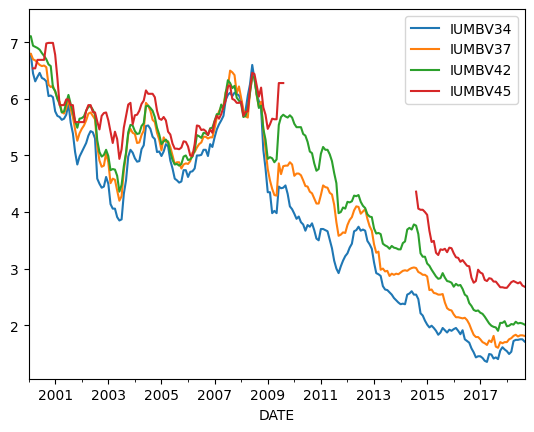

In [11]:
df.plot();

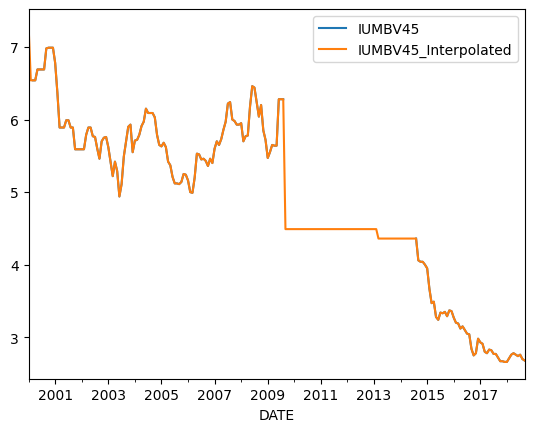

In [12]:
df['IUMBV45_Interpolated'] = df['IUMBV45'].fillna(method='bfill')
df[['IUMBV45', 'IUMBV45_Interpolated']].plot();

In [4]:
url_endpoint = 'https://www.bankofengland.co.uk/-/media/boe/files/statistics/gdp-real-time-database/real-output.xlsx'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/54.0.2840.90 '
                  'Safari/537.36'
}

#We can use the requests package to construct the URL with the dictionary of parameters:
response = requests.get(url_endpoint,   headers=headers)

# Check if the response was successful, it should return '200'
print(response.status_code)
print(response.url)

200
https://www.bankofengland.co.uk/-/media/boe/files/statistics/gdp-real-time-database/real-output.xlsx


In [5]:
df = pd.read_excel(io.BytesIO(response.content))
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Variable,NaN,NaN,NaN,1st vintage,ONS code,BoE bespoke code
1,NaN,Services,NaN,NaN,NaN,1993-03-01 00:00:00,L2NC.Q,-
2,NaN,o/w,"Distribution, hotels and catering; repairs",NaN,NaN,2011-10-01 00:00:00,L2PZ.Q,-
3,NaN,NaN,o/w,Wholesale and retail trade and repairs,NaN,1997-06-01 00:00:00,L2NE.Q,-
4,NaN,NaN,NaN,Accommodation and food services,NaN,2011-09-01 00:00:00,L2NQ.Q,-
